# Part 2: Data Preprocessing

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Feture elaboration:

- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.drop('id', axis = 1, inplace = True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## Data Preprocessing

In [4]:
## Cleaning dirty data: Categorical Data
def data_cleaning():

    rbc_map = {'normal':0, 'abnormal':1}
    df['rbc'] = df.rbc.map(rbc_map)

    pc_map = {'normal':0, 'abnormal':1}
    df['pc'] = df.pc.map(pc_map)

    pcc_map = {'notpresent':0, 'present':1}
    df['pcc'] = df.pcc.map(pcc_map)

    ba_map = {'notpresent':0, 'present':1}
    df['ba'] = df.ba.map(ba_map)

    htn_map = {'no':0, 'yes':1}
    df['htn'] = df.htn.map(htn_map)

    dm_map = {'no':0, '\tno': 0, 'yes':1, '\tyes': 1, ' yes': 1}
    df['dm'] = df.dm.map(dm_map)

    cad_map = {'no':0, '\tno': 0, 'yes':1}
    df['cad'] = df.cad.map(cad_map)

    appet_map = {'poor':0, 'good':1}
    df['appet'] = df.appet.map(appet_map)

    pe_map = {'no':0, 'yes':1}
    df['pe'] = df.pe.map(pe_map)

    ane_map = {'no':0, 'yes':1}
    df['ane'] = df.ane.map(ane_map)

    classification_map = {'notckd':0, 'ckd':1, 'ckd\t': 1}
    df['classification'] = df.classification.map(classification_map)

    ## Cleaning dirty data: Numerical Data

    df.pcv = df.pcv.replace('\t?', np.nan)
    df.pcv = df.pcv.replace('\t43', 43)
    df.pcv = pd.to_numeric(df.pcv, errors='coerce')

    df.wc = df.wc.replace('\t?', np.nan)
    df.wc = df.wc.replace('\t6200', 6200)
    df.wc = df.wc.replace('\t8400', 8400)
    df.wc = pd.to_numeric(df.wc, errors='coerce')

    df.rc = df.rc.replace('\t?', np.nan)
    df.rc = pd.to_numeric(df.rc, errors='coerce')

In [5]:
## Renaming the columns
def rename():

    col_name={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

    df.rename(columns=col_name, inplace=True)

In [6]:
data_cleaning()
rename()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    float64
 6   pus_cell                 335 non-null    float64
 7   pus_cell_clumps          396 non-null    float64
 8   bacteria                 396 non-null    float64
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### What about Missing Values?

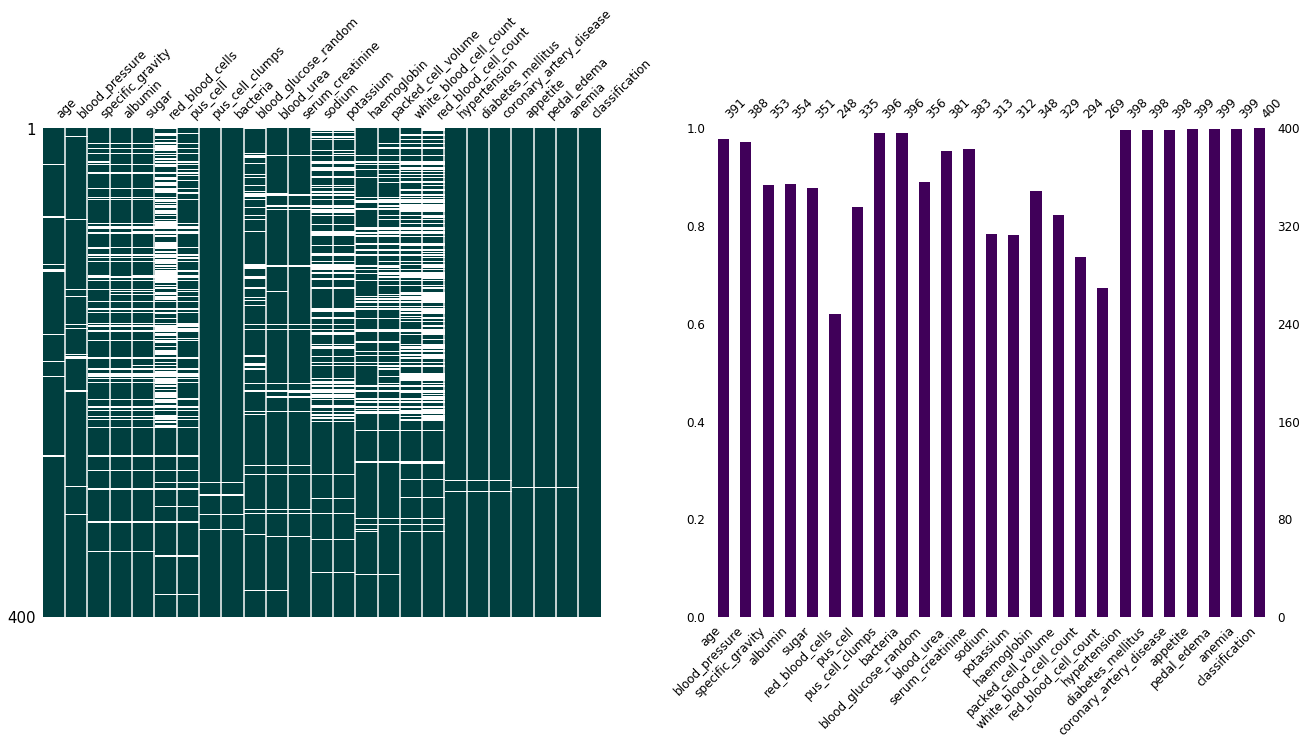

In [9]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,9))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.35))
plt.show()

In [10]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

miss = dfmiss (df)
miss.head(50)

,data_type,unique_values,have_null?,how many?,%
age,float64,76,True,9,2.25
blood_pressure,float64,10,True,12,3.00
specific_gravity,float64,5,True,47,11.75
albumin,float64,6,True,46,11.50
sugar,float64,6,True,49,12.25
red_blood_cells,float64,2,True,152,38.00
pus_cell,float64,2,True,65,16.25
pus_cell_clumps,float64,2,True,4,1.00
bacteria,float64,2,True,4,1.00
blood_glucose_random,float64,146,True,44,11.00


In [11]:
df = df[df['classification'].notnull()]

#### Which columns contain missing values?

In [12]:
d = dfmiss(df)
missing_val_col = d[d['have_null?'] == True].index.to_list()
missing_val_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

### Random Sample Imputation

In [13]:
def impute_nan(df, variable, median, mean, mode):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_mean"] = df[variable].fillna(mean)
    df[variable + "_mode"] = df[variable].fillna(mode)
    df[variable + "_random"] = df[variable]
    # It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

In [14]:
def comp(col):
    median = df[col].median()
    mean = df[col].mean()
    mode = df[col].mode()

    impute_nan(df, col, median, mean, mode)

    fig = plt.figure(figsize = (8, 4))
    ax = fig.add_subplot(111)
    
    df[col].plot(kind='kde', ax=ax, color='black')
    df[col +'_median'].plot(kind='kde', ax=ax, color='seagreen')
    df[col +'_mean'].plot(kind='kde', ax=ax, color='gray')
    df[col +'_mode'].plot(kind='kde', ax=ax, color='yellow')
    df[col +'_random'].plot(kind='kde', ax=ax, color='salmon')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

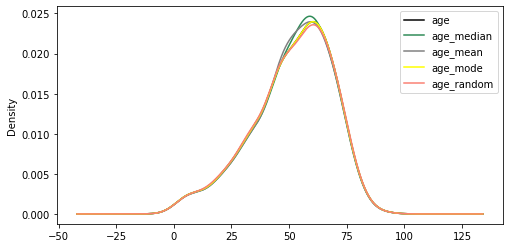

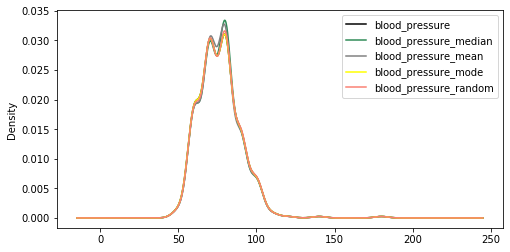

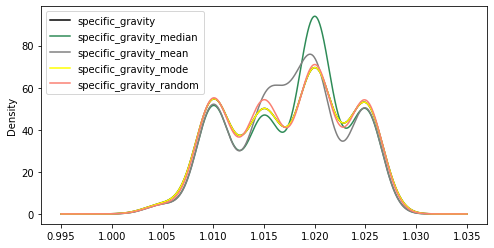

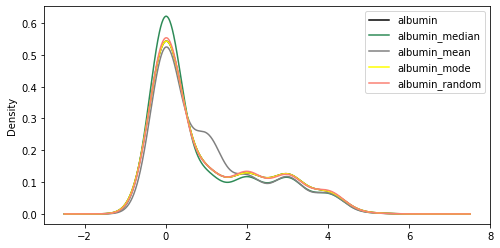

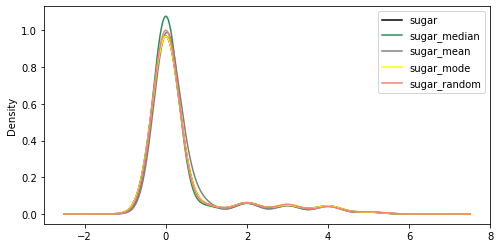

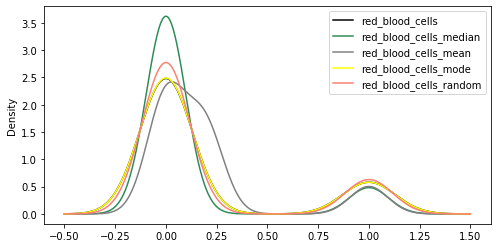

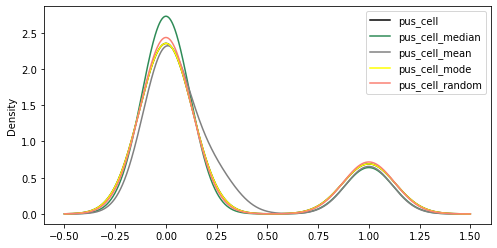

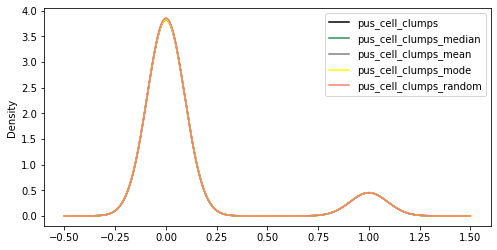

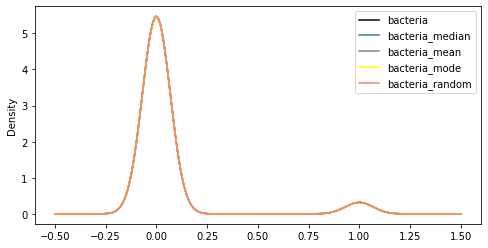

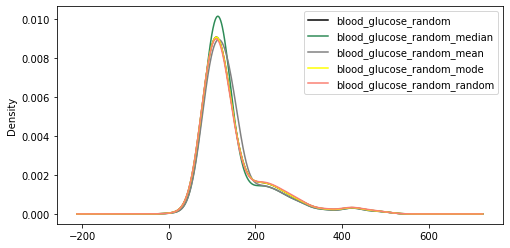

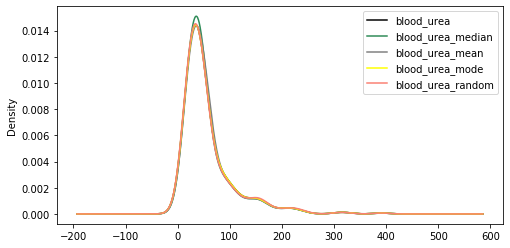

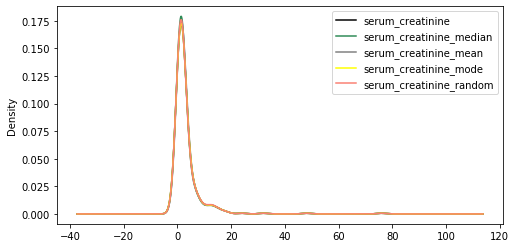

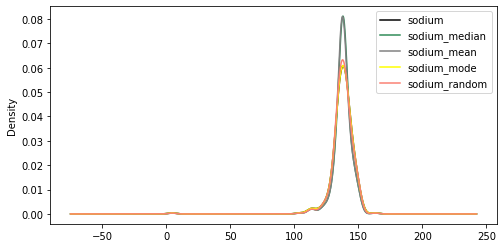

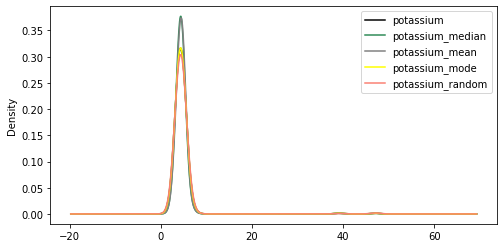

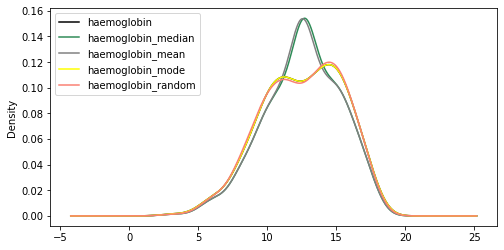

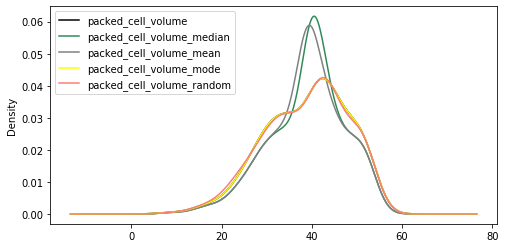

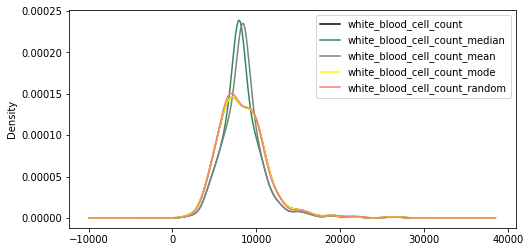

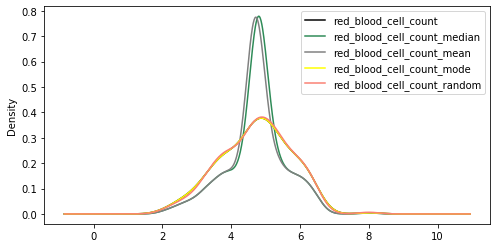

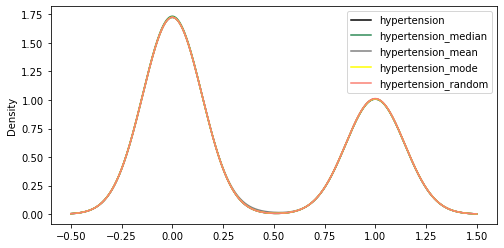

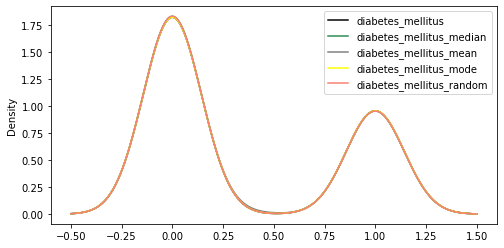

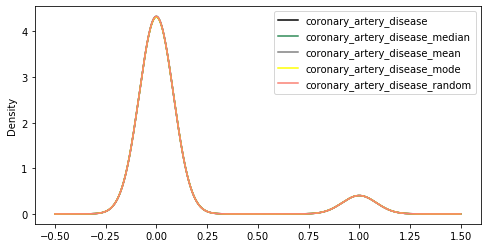

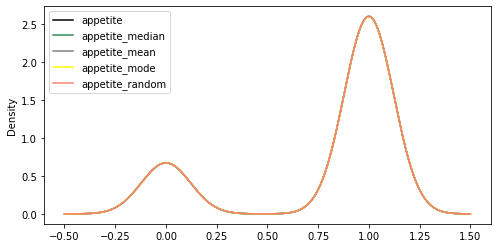

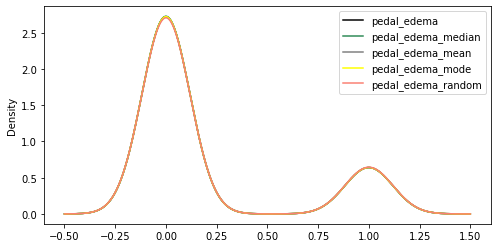

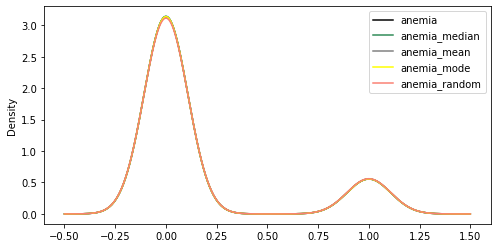

In [15]:
for col in missing_val_col:
    comp(col)

### We will impute the missing values with the mode of each column

In [16]:
df = pd.read_csv('kidney_disease.csv')
df.drop('id', axis = 1, inplace = True)

data_cleaning()
rename()

for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

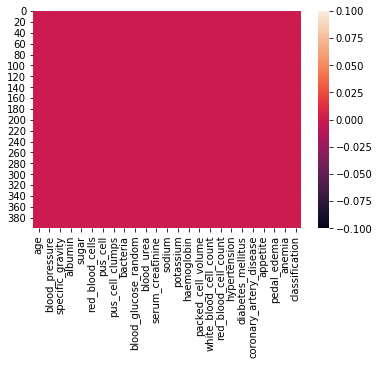

In [17]:
sns.heatmap(pd.isnull(df))
df.isnull().sum()

##### **Cool!

In [18]:
df.to_csv('preprocessed_kidney_disease.csv')